# Loading the appropriate packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve


# loading in Data Set

In [2]:
A = [109, 112, 147, 147, 150, 151, 156, 160 ]
Z = [53, 55, 69, 69, 71, 71, 73, 75]
Q = [.829, .977, 1.071, 1.139, 1.285, 1.255 , 1.015, 1.250]
n = [1, 0 ,0 , 1 , 0, 0, 1, 1 ]
l = [2, 4 , 5, 2, 5, 5, 2, 2 ]
j = [5/2, 7/2, 11/2 , 3/2 , 11/2, 11/2 , 3/2, 3/2]
Gamma_exp = [1.09e-4 , 3.3e-5, 2.7, 3.6e-4, 1e-2, 1.2e-1, 1.65e-1, 8.7e-4]

print(len(A))
print(len(Z))
print(len(Q))
print(len(n))
print(len(l))
print(len(j))
print(len(Gamma_exp))

8
8
8
8
8
8
8


# Constants needed for the calculation

In [3]:
#constants
e = np.sqrt(1.4399764) #sqrt(Mev fm)
a  = 0.7 #fm 
hbar_mpi_c_squared = 2.044 # fm**2

hbar = 197.32 # 

# Potentals
V_0 = 54 # MeV
V_SO = 0.2 * V_0

mu  = 938

# Calculating the potential

In [4]:
def V_coul(r, Z, A):
    R = 1.2 * A**(1/3) # fm 
    if (r > R):
        result = (Z * e**2)/ r
    else:
        result = (Z* e**2)/(2 *R) * (3  - (r/R)**2 )
    return result

fws = lambda r : (1 + np.exp( (r - R)/a ))**-1
dfws_dr = lambda r : - ( 1 + np.exp((r - R)/a) )**(-2) * np.exp((r - R)/a) * 1/a
l_dot_s  = lambda j, l : 1/2 *( j* (j + 1) - l * (l  + 1) - .5 * (1.5) )
V_ws = lambda r, j , l : - V_0 * fws(r) + V_SO * hbar_mpi_c_squared * (2/r) * dfws_dr(r) * l_dot_s(j , l)
V = lambda r , j , l , Z , A :  V_ws(r,j, l) + V_coul(r, Z, A) +  (hbar**2)/ (2 * (r**2) * mu)* (l * (l + 1 ))

In [5]:
hbar

197.32

In [6]:
mu

938

# Testing to see if it works

In [7]:
c = 3
R = 1.2 * A[c]**(1/3) 

r_test = np.linspace(.1, 15, 1000)

V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]

E_test = [Q[c] for i in r_test.tolist()]

#for i in range(len(r_test)):
#    print( r_test[i], "     ", V_test[i], "    ", E_test[i])

#plt.plot(r_test, V_test)
#plt.plot(r_test, E_test, color = "red")
#plt.show()

#r_0 = [0.0045, ] 

# Finding the roots to integrate over

In [8]:
def r0_finder(r, V, E):

    results = 0

    for i in range(len(r)):
    
        if (V[i - 1] > E[i]) and (V[i] < E[i]):
            results  = r[i] - (r[i] - r[i - 1])/2


    return results

r_0 = []

for c  in range(len(j)):
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(.0001, 6, 1000)
    V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_0.append(r0_finder(r_test, V_test, E_test))

print(r_0)

[1.87093968968969, 3.534575625625626, 4.267296146146146, 1.9670341841841843, 4.285313863863864, 4.279307957957958, 1.9970637137137142, 2.00306961961962]


In [9]:
def r1_finder(r, V, E):

    results = 0

    for i in range(len(r)):
    
        if (V[i - 1] < E[i]) and (V[i] > E[i]):
            results  = r[i] - (r[i] - r[i - 1])/2


    return results

r_1 = []

for c  in range(len(j)):
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(.1, 15, 1000)
    V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_1.append(r1_finder(r_test, V_test, E_test))

print(r_1)

[6.61036036036036, 5.372422422422423, 6.550700700700701, 6.72967967967968, 6.595445445445446, 6.625275275275275, 6.804254254254254, 6.863913913913914]


In [10]:
def r2_finder(r, V, E):

    results = 0

    for i in range(len(r)):
    
        if (V[i - 1] > E[i]) and (V[i] < E[i]):
            results  = r[i] - (r[i] - r[i - 1])/2


    return results

r_2 = []

for c  in range(len(j)):
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(8, 120, 1000)
    V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_2.append(r0_finder(r_test, V_test, E_test))

print(r_2)

[93.7097097097097, 85.97397397397398, 98.64264264264264, 88.44044044044044, 85.3013013013013, 87.2072072072072, 104.6966966966967, 87.54354354354354]


# Calculating the half - life 

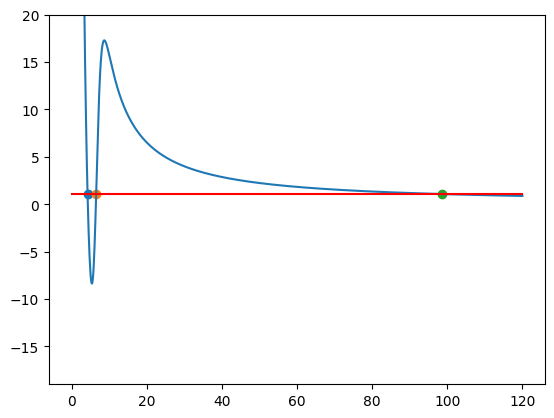

In [11]:
c = 2
R = 1.2 * A[c]**(1/3) 

r_test = np.linspace(.001, 120, 1000)

V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]

E_test = [Q[c] for i in r_test.tolist()]

plt.scatter(r_0[c], Q[c])
plt.scatter(r_1[c], Q[c])    
plt.scatter(r_2[c], Q[c])    
#for i in range(len(r_test)):
#    print( r_test[i], "     ", V_test[i], "    ", E_test[i])

plt.plot(r_test, V_test)
plt.plot(r_test, E_test, color = "red")
#plt.xlim(0,10)
plt.ylim(-19,20)
plt.show()

#r_0 = [0.0045, ]
 

2.517058417892256e-05
0.0008539685522463964
4.150148246437998
0.0005699496994306476
0.041267978767185604
0.09534581926136573
0.5120039782371909
0.0016645108795943545


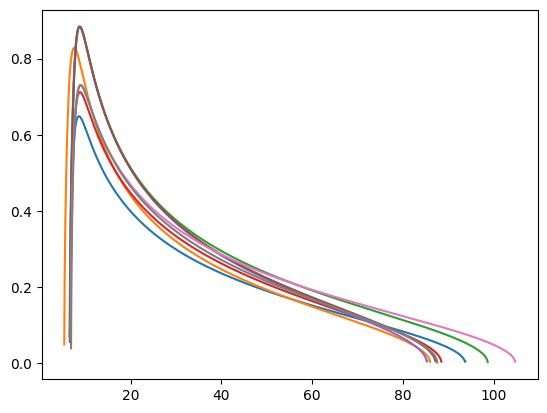

In [12]:
#spectroscoptic factor 
S = 1
Gamma_half =[]

for c in range (8):
    # Wave Number/ Vector etc
    R = 1.2 * A[c]**(1/3) 
    k = lambda r : np.sqrt(2 * mu * abs(Q[c] - V(r, j[c], l[c], Z[c], A[c] ) ) ) / hbar

    #Calculating N
    num_points = 1000
    r0_r1_mesh = np.linspace(r_0[c], r_1[c], num_points )
    dr = (-r_0[c] + r_1[c])/num_points
    N_integrand= np.array([(2 *k(i))**-1 for i in r0_r1_mesh.tolist()])
    N = ((np.sum(N_integrand)) * dr)**-1

    num_points = 1000
    r1_r2_mesh = np.linspace(r_1[c], r_2[c], num_points )
    Gamma_integrand = np.array([k(i) for i in r1_r2_mesh.tolist()])
    dr = (- r_1[c] + r_2[c])/num_points
    plt.plot(r1_r2_mesh, Gamma_integrand)

    gamma_value = np.log(2)/(S * N * (hbar**2/ (4 * mu)) * np.exp(- 2 *np.sum(Gamma_integrand) * dr))
    gamma_value = hbar * gamma_value

    Gamma_half.append( gamma_value * 1e-15/(3e8) )

for i in Gamma_half:
    print(i)


In [13]:
(np.sum(Gamma_integrand) * dr)

21.911371258485396

In [14]:
N

0.284108709917145

In [15]:

S_p = []
for i in range(len(Gamma_exp)):
    S_p.append(Gamma_half[i]/Gamma_exp[i])
    
for i in range(len(Gamma_exp)):
    print(S_p[i])

0.23092279063231705
25.877834916557465
1.5370919431251842
1.5831936095295764
4.126797876718561
0.7945484938447145
3.103054413558733
1.913230896085465


4.00005
7.147297297297298
92.81281281281281
[14044.73355138918, 3821.6034856685415, 946.1933469958177, 241.023473748075, 52.60454010092852, 11.703471258026218, 2.273351905813057, 0.4177239927931234, 0.06867741033824679, 0.009456707992758832, 0.0010500941482651013, 7.625380000722703e-05, 1.340163375270248e-05, 4.540676193086742e-06, 2.36317179399737e-06, 1.6754750101052505e-06, 1.4960753144279373e-06, 1.596686015662638e-06, 1.9591171292408943e-06, 2.6890984666040276e-06, 4.024768801844422e-06, 6.569920445525437e-06, 1.1389359211190555e-05, 2.073930241681666e-05, 3.929115464800961e-05, 7.697662123633507e-05, 0.00015497758265996877, 0.0003195265449754435, 0.0006707378147945435, 0.0014271266073348108, 0.0031052433065181803, 0.006864740099451342, 0.015258329062442563, 0.03416556647902443, 0.0767701524537714, 0.173570227487735, 0.39280959660888776, 0.8898519980309303, 2.02181718979564, 4.64651156034586, 10.658672226497693, 24.40420075969385, 55.762479885158115, 127.25703722516405, 289.506331

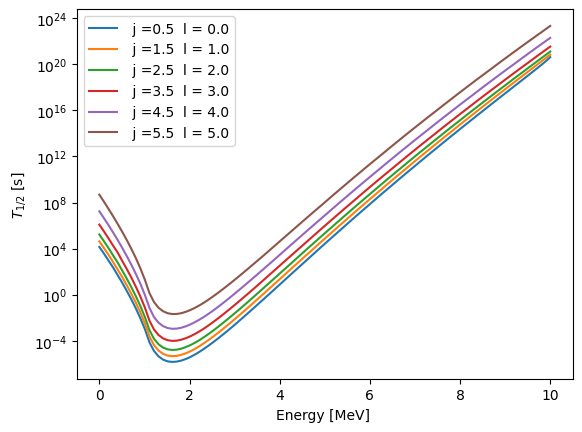

In [16]:
#spectroscoptic factor 
S = 1
c = 2

l_range = np.linspace(0,5, 6)
E_range = np.linspace(0, 10, 100)

for l_n in l_range:

    Gamma_half = []

    r_0 = 0
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(.0001, 8, 1000)
    V_test = [V(i, l_n + .5, l_n, Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_0 = r0_finder(r_test, V_test, E_test)

    print(r_0)
    

    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(.1, 15, 1000)
    V_test = [V(i, l_n + .5, l_n, Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_1 = (r1_finder(r_test, V_test, E_test))

    print(r_1)

    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(8, 120, 1000)
    V_test = [V(i, l_n + .5, l_n, Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_2 = (r0_finder(r_test, V_test, E_test))

    print(r_2)

    for i in E_range:
        # Wave Number/ Vector etc
        R = 1.2 * A[c]**(1/3) 
        k = lambda r : np.sqrt(2 * mu * abs(i - V(r, l_n +.5, l_n , Z[c], A[c] ) ) ) / hbar

        #Calculating N
        num_points = 1000
        r0_r1_mesh = np.linspace(r_0, r_1, num_points )
        dr = (-r_0 + r_1)/num_points
        N_integrand= np.array([(2 *k(i))**-1 for i in r0_r1_mesh.tolist()])
        N = ((np.sum(N_integrand)) * dr)**-1

        num_points = 1000
        r1_r2_mesh = np.linspace(r_1, r_2, num_points )
        Gamma_integrand = np.array([k(i) for i in r1_r2_mesh.tolist()])
        dr = (- r_1 + r_2)/num_points
        #plt.plot(r1_r2_mesh, Gamma_integrand)

        gamma_value = np.log(2)/(S * N * (hbar**2/ (4 * mu)) * np.exp(- 2 *np.sum(Gamma_integrand) * dr))
        gamma_value = hbar * gamma_value
        Gamma_half.append( gamma_value * 1e-15/(3e8) )
    print(Gamma_half)

    plt.plot(E_range, Gamma_half, label = " j =" + str(l_n +.5) + "  l = " + str(l_n))
plt.semilogy()
plt.xlabel("Energy [MeV] ")
plt.ylabel("$T_{1/2}$ [s]")
plt.legend()



3.367425275275276
7.699149149149149
24.088088088088085


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


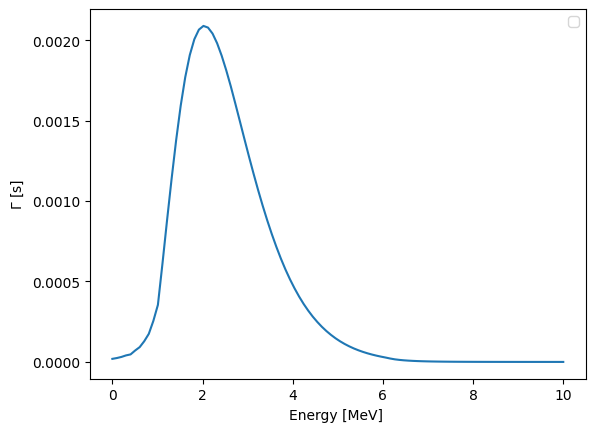

In [20]:
V = lambda r , j , l  :  V_ws(r,j, l) +  (hbar**2)/ (2 * (r**2) * mu)* (l * (l + 1 ))

A = 150

E_range = np.linspace(0, 10, 100)

l_n = 5 
Gamma = []

r_0 = 0
R = 1.2 * A**(1/3) 
r_test = np.linspace(.0001, 8, 1000)
V_test = [V(i, l_n + .5, l_n ) for i in r_test.tolist()]
E_test = [Q[c] for i in r_test.tolist()]
r_0 = r0_finder(r_test, V_test, E_test)

print(r_0)
    

R = 1.2 * A**(1/3) 
r_test = np.linspace(.1, 15, 1000)
V_test = [V(i, l_n + .5, l_n ) for i in r_test.tolist()]
E_test = [Q[c] for i in r_test.tolist()]
r_1 = (r1_finder(r_test, V_test, E_test))

print(r_1)

R = 1.2 * A**(1/3) 
r_test = np.linspace(8, 120, 1000)
V_test = [V(i, l_n + .5, l_n ) for i in r_test.tolist()]
E_test = [Q[c] for i in r_test.tolist()]
r_2 = (r0_finder(r_test, V_test, E_test))

print(r_2)

for i in E_range:
    # Wave Number/ Vector etc
    R = 1.2 * A**(1/3) 
    k = lambda r : np.sqrt(2 * mu * abs(i - V(r, l_n +.5, l_n) ) ) / hbar

    #Calculating N
    num_points = 1000
    r0_r1_mesh = np.linspace(r_0, r_1, num_points )
    dr = (-r_0 + r_1)/num_points
    N_integrand= np.array([(2 *k(i))**-1 for i in r0_r1_mesh.tolist()])
    N = ((np.sum(N_integrand)) * dr)**-1

    num_points = 1000
    r1_r2_mesh = np.linspace(r_1, r_2, num_points )
    Gamma_integrand = np.array([k(i) for i in r1_r2_mesh.tolist()])
    dr = (- r_1 + r_2)/num_points
    #plt.plot(r1_r2_mesh, Gamma_integrand)

    gamma_value = (S * N * (hbar**2/ (4 * mu)) * np.exp(- 2 *np.sum(Gamma_integrand) * dr))
    Gamma.append(gamma_value)

plt.plot(E_range, Gamma) 
plt.xlabel("Energy [MeV] ")
plt.ylabel("$\Gamma$ [s]")
plt.legend()
